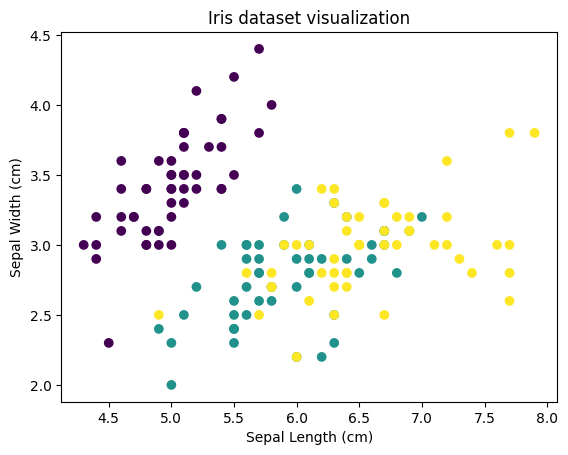

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

# Load Iris
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

# Scatter plot
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["target"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris dataset visualization")
plt.show()


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

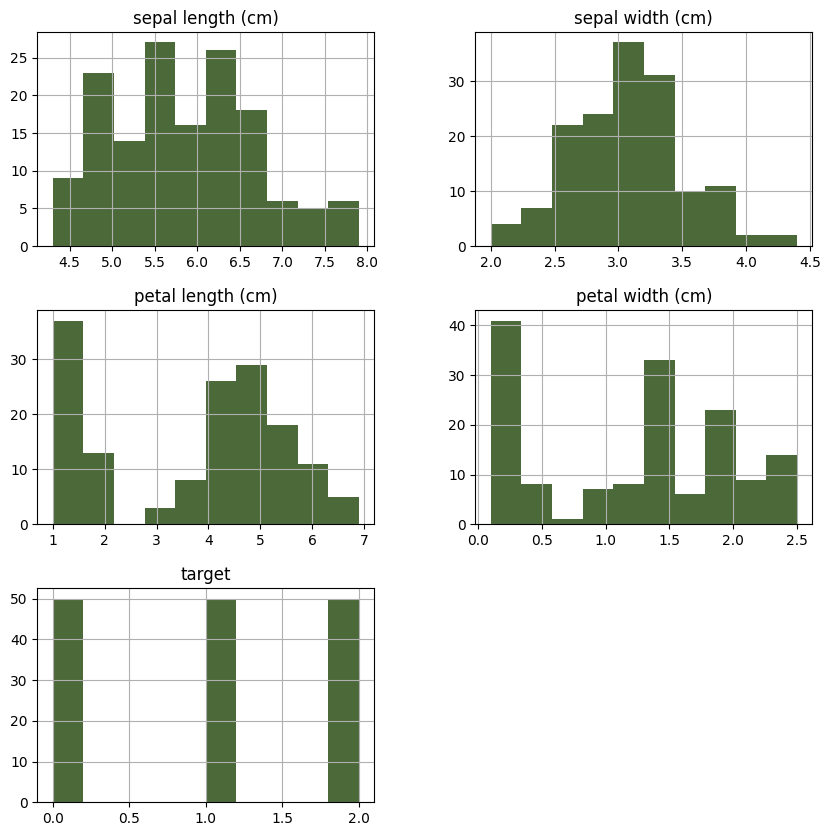

In [2]:
df.hist(figsize=(10,10),bins=10,color="#446230F4")

The target is ordinally encoded

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


It is a very good and clean dataset,i don't think it needs scaling

In [5]:
corr_matrix=df.corr()
corr_matrix['target'].sort_values(ascending=False)


target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

3 of data samples have perfect correlation,so let us use stratified spplitting

In [6]:

df['petal length cat']=pd.cut(x=df['petal length (cm)'],bins=[1,2,4,5,6],labels=[1,2,4,6])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int64   
 5   petal length cat   140 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [7]:
#filling the NaN values
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')
impute.fit(df)
df_prepared=impute.transform(df)
df_prepared=pd.DataFrame(df_prepared,columns=df.columns)

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
strata=StratifiedShuffleSplit(test_size=0.2,random_state=42)
for train_index,test_index in strata.split(df_prepared,df_prepared['petal length cat']):
    train_strata_set=df.loc[train_index]
    test_strata_set=df.loc[test_index]

In [9]:
train_X=train_strata_set.drop(['target','petal length cat'],axis=1)
train_y=-train_strata_set['target']
test_X=test_strata_set.drop(['target','petal length cat'],axis=1)
test_y=test_strata_set['target']

In [10]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 18 to 35
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [11]:
#let us try a binary classification task,which says wether a sample of data is Iris Setosa or not
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
sgd=SGDClassifier()
sgd.fit(train_X,train_y)
sgd_pred=sgd.predict(train_X)
#measuring the performance by accuracy
accuracy_score(y_true=train_y,y_pred=sgd_pred)

0.9666666666666667

remember that performance measures like accuracy do not work for skewed datasets such as this that only 4.2 percent of data represents  Iris Setosa so if model predicts 0 all the time it is 95.8% of the time right

In [23]:
#let us use confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=train_y,y_pred=sgd_pred)

array([[39,  3,  0],
       [ 1, 37,  0],
       [ 0,  0, 40]])

In [24]:
#let us use f1 score
from sklearn.metrics import f1_score
f1_score(y_true=train_y,y_pred=sgd_pred,average='weighted')

0.9666875130289765

This shows that model is doing well on training data let us try it on test set

In [27]:
test_pred=sgd.predict(test_X)
f1_score(y_true=test_y,y_pred=test_pred,average='weighted')

0.3

unfortunately we have overfitting in this case!

In [ ]:
#using ridge classifier!
from sklearn.linear_model import RidgeClassifier
ridge=RidgeClassifier(alpha=30)
ridge.fit(train_X,train_y)
ridge_pred=ridge.predict(train_X)
f1_score(train_y,ridge_pred,average='weighted')

0.804394861392833

It is not that bad

In [47]:
test_ridge=ridge.predict(test_X)
f1_score(test_y,test_ridge,average='weighted')

0.3333333333333333

In [ ]:
# a simpler model must be used such as softmax regression
from sklearn.linear_model import LogisticRegression
softmax=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax.fit(train_X,train_y)
softmax_pred=softmax.predict(train_X)
f1_score(train_y,softmax_pred,average='weighted')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9916601307189542

the model does remarkabely good at training data let's see what it does at test set

In [71]:
test_pred_softmax=softmax.predict(test_X)
f1_score(test_y,test_pred_softmax,average='weighted')

0.3333333333333333

Sepal width has the lowest correlation with target label y so let us delete this useless feature

In [75]:
train_X=train_X.drop('sepal width (cm)',axis=1)
test_X=test_X.drop('sepal width (cm)',axis=1)

In [76]:
# a simpler model must be used such as softmax regression
from sklearn.linear_model import LogisticRegression
softmax=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax.fit(train_X,train_y)
softmax_pred=softmax.predict(train_X)
f1_score(train_y,softmax_pred,average='weighted')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9916601307189542

In [77]:
test_pred_softmax=softmax.predict(test_X)
f1_score(test_y,test_pred_softmax,average='weighted')

0.3333333333333333

In [85]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
train_scaled=scale.fit_transform(train_X)
test_scaled=scale.fit_transform(test_X)

In [90]:
# a simpler model must be used such as softmax regression
from sklearn.linear_model import LogisticRegression
softmax=LogisticRegression(multi_class='multinomial',C=1)
softmax.fit(train_scaled,train_y)
softmax_pred=softmax.predict(train_scaled)
f1_score(train_y,softmax_pred,average='weighted')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9750117352526991

In [91]:
test_pred_softmax=softmax.predict(test_scaled)
f1_score(test_y,test_pred_softmax,average='weighted')

0.3333333333333333

In [95]:
#it does not change so we use random forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
random_forest=RandomForestClassifier(n_estimators=10,max_depth=3)
random_forest.fit(train_scaled,train_y)
random_pred=random_forest.predict(train_scaled)
f1_score(train_y,random_pred,average='weighted')

0.9833333333333333

In [96]:
test_renadom_pred=random_forest.predict(test_scaled)
f1_score(test_y,test_renadom_pred,average='weighted')

0.3333333333333333

In [97]:
#defining the entire datasets features and targets
df_x=df_prepared.drop('target',axis=1)
df_y=df_prepared['target']

In [99]:
#let's use cross val score instead of splitting data into train and test
from sklearn.model_selection import cross_val_score
cross_val_score(random_forest,df_x,df_y,scoring='f1_weighted',cv=3)

array([0.97996313, 0.9398894 , 0.97998268])

we have used cross validation instead of direct train_test splitting and we have a gratifying output so the project is done well see you in the next projects